In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [147]:
df= pd.read_csv('/content/insurance.csv')

In [148]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [149]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [151]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [152]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [153]:
df['sex']=df['sex'].map({'female':0,'male':1}).astype(int)

In [154]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,yes,southwest,16884.9240
1,18,1,33.77,1,no,southeast,1725.5523


In [155]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [156]:
df['smoker']=df['smoker'].map({'no':0,'yes':1}).astype(int)

In [157]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,southwest,16884.9240
1,18,1,33.77,1,0,southeast,1725.5523


In [158]:
df['region']=df['region'].map({'southwest':0,'southeast':1,'northwest':2,'northeast':3}).astype(int)

In [159]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,1,1629.83350
1336,21,0,25.800,0,0,0,2007.94500


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [161]:
df['bmi']=df['bmi'].astype(int)

In [162]:
df['charges']=df['charges'].astype(int)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       1338 non-null   int64
 1   sex       1338 non-null   int64
 2   bmi       1338 non-null   int64
 3   children  1338 non-null   int64
 4   smoker    1338 non-null   int64
 5   region    1338 non-null   int64
 6   charges   1338 non-null   int64
dtypes: int64(7)
memory usage: 73.3 KB


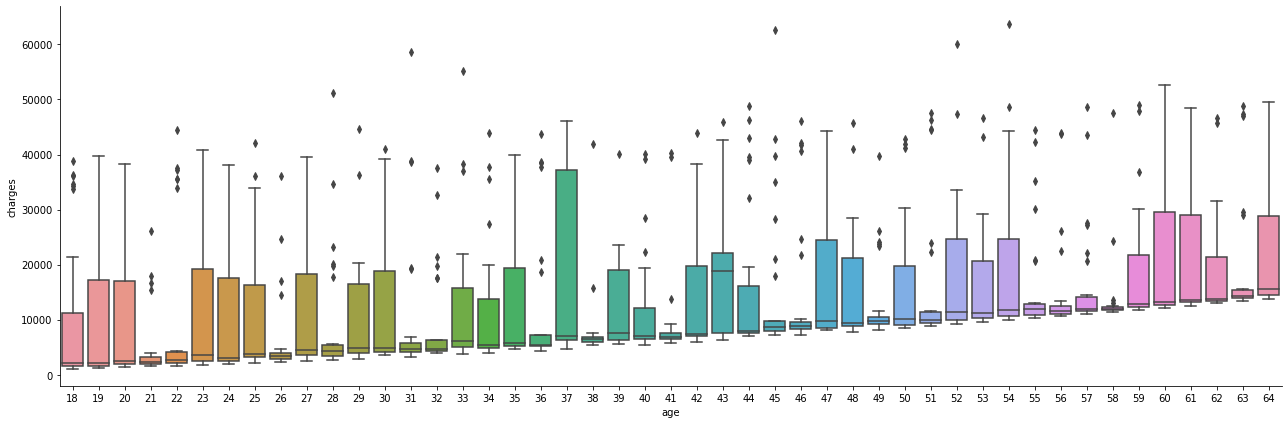

In [164]:
sns.catplot(y='charges', x='age', data=df.sort_values("charges", ascending=False),kind="box", height=6, aspect=3)

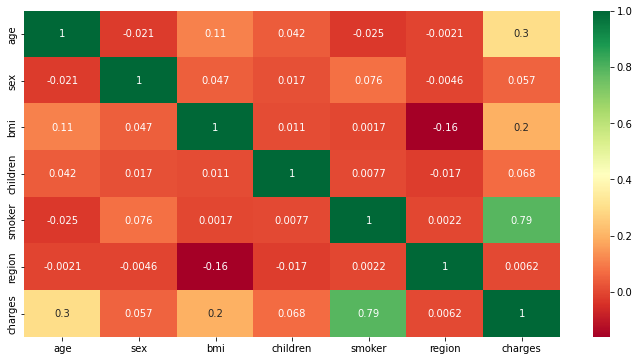

In [165]:
#now i am finding the correlation between independent and dependent features
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot= True, cmap='RdYlGn')

In [166]:
x= df.drop(columns='charges', axis=1)
y= df['charges']

In [167]:
print(x)

      age  sex  bmi  children  smoker  region
0      19    0   27         0       1       0
1      18    1   33         1       0       1
2      28    1   33         3       0       1
3      33    1   22         0       0       2
4      32    1   28         0       0       2
...   ...  ...  ...       ...     ...     ...
1333   50    1   30         3       0       2
1334   18    0   31         0       0       3
1335   18    0   36         0       0       1
1336   21    0   25         0       0       0
1337   61    0   29         0       1       2

[1338 rows x 6 columns]


Splitting the data into Training data & Testing Data

In [168]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=21)

In [169]:
print(x.shape, x_train.shape, y_test.shape)

(1338, 6) (1070, 6) (268,)


Model Training

Linear Regression

In [170]:
from sklearn.linear_model import LinearRegression

In [171]:
# loading the Linear Regression model
regressor = LinearRegression()

In [172]:
regressor.fit(x_train,y_train)

LinearRegression()

In [173]:
training_data_prediction= regressor.predict(x_train)

In [174]:
from sklearn import metrics

In [175]:
# R squared value
r2_train = metrics.r2_score(y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.7542076104048236


In [176]:
# prediction on test data
test_data_prediction =regressor.predict(x_test)

In [177]:
# R squared value
r2_test = metrics.r2_score(y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7338765583098394


Building a Predictive System

In [179]:
input_data = (21,0,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[25152.66987055]
The insurance cost is USD  25152.66987055342


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
